# 🌍 2D Random Walk in Python

In a **2D random walk**, the walker moves in two directions along both the x-axis and y-axis.

At each step:
- The walker moves one unit in a random direction: up, down, left, or right.
- Over time, the path spreads out, illustrating a simple model of diffusion.


In [39]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(17)


## Step 1: Define the Steps

At each time step, the walker randomly chooses one of the four directions:
- Up:    (0, +1)
- Down:  (0, -1)
- Left:  (-1, 0)
- Right: (+1, 0)

In [40]:
# Number of steps
n_steps = 1000

# Define moves
moves = np.array([
    [0, 1],   # up
    [0, -1],  # down
    [-1, 0],  # left
    [1, 0]    # right
])

# Randomly choose directions
steps = moves[np.random.choice(4, size=n_steps)]

# Initialize list to store directions
directions = []

print("\nStep and Corresponding directions:")

# Loop only first 10 steps
for step in steps[:10]:
    if np.array_equal(step, [0, 1]):
        direction = "up"
    elif np.array_equal(step, [0, -1]):
        direction = "down"
    elif np.array_equal(step, [-1, 0]):
        direction = "left"
    elif np.array_equal(step, [1, 0]):
        direction = "right"

    directions.append(direction)
    print(step, f"→ {direction}")



Step and Corresponding directions:
[1 0] → right
[ 0 -1] → down
[1 0] → right
[-1  0] → left
[-1  0] → left
[ 0 -1] → down
[0 1] → up
[ 0 -1] → down
[-1  0] → left
[1 0] → right


## Step 2: Compute the Position at Each Step

We’ll compute the cumulative sum of all previous moves along both axes.

Formally:

$$
X_t = \sum_{i=1}^{t} \varepsilon_{i,x}
\qquad \text{and} \qquad
Y_t = \sum_{i=1}^{t} \varepsilon_{i,y}
$$

where each $\varepsilon_i$ = ($\varepsilon_{i,x}$, $\varepsilon_{i,y}$) is a random step.


In [41]:
# Compute the cumulative sum of steps
positions = np.cumsum(steps, axis=0)

# Separate x and y coordinates
x, y = positions[:,0], positions[:,1]

# Display the final position
(x[-1], y[-1])

(19, -19)

## Step 3: Visualize the 2D Random Walk

Let’s plot the entire trajectory.

- The starting point is marked in **green**.
- The ending point is marked in **red**.


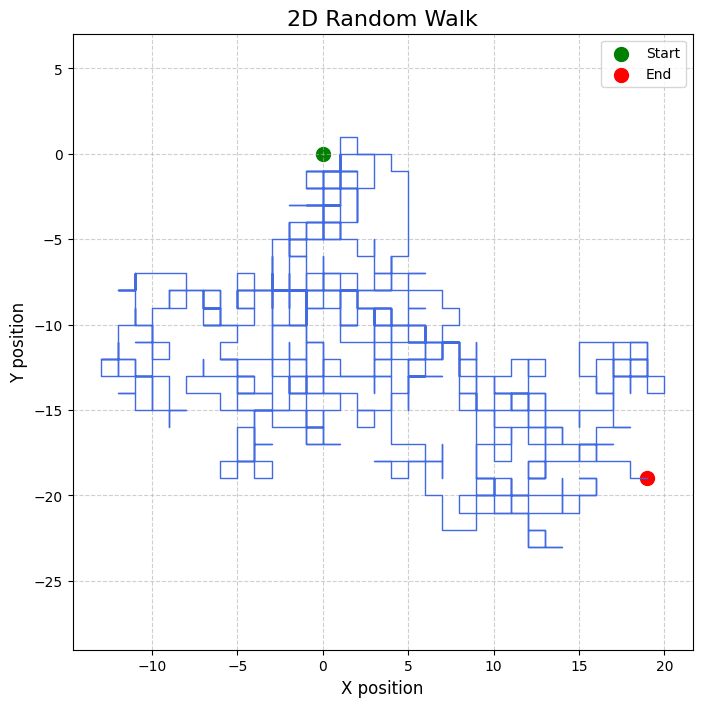

In [42]:
plt.figure(figsize=(8, 8))
plt.plot(x, y, color='royalblue', linewidth=1)
plt.scatter(0, 0, color='green', s=100, label='Start')
plt.scatter(x[-1], y[-1], color='red', s=100, label='End')
plt.title("2D Random Walk", fontsize=16)
plt.xlabel("X position", fontsize=12)
plt.ylabel("Y position", fontsize=12)
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()